In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('TED_Preprocessed.csv')
df.head()

,video_link,duration,title,views,likes,comments,date,month,year,date_month_year,day
0,https://www.youtube.com//watch?v=FrqBWQ-mVEc,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,21/4/2022,Thu
1,https://www.youtube.com//watch?v=iIne-UO7wUo,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,20/4/2022,Wed
2,https://www.youtube.com//watch?v=5T2VRY0LECc,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,20/4/2022,Wed
3,https://www.youtube.com//watch?v=YRvf00NooN8,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,18/4/2022,Mon
4,https://www.youtube.com//watch?v=cdZZpaB2kDM,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,14/4/2022,Thu


In [2]:
del df['video_link']
del df['date_month_year']

### 1. Analysing likes

In [3]:
print('Max = ', max(df['likes']))
print('Min = ', min(df['likes']))
print('Avg = ', int(df['likes'].mean()))

Max =  1600000
Min =  36
Avg =  11027


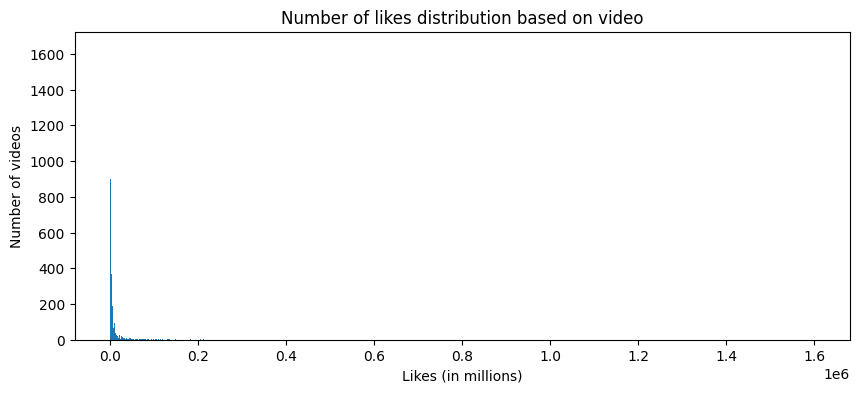

In [4]:
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(df['likes'], bins = 1000)
plt.title('Number of likes distribution based on video')
plt.xlabel('Likes (in millions)')
plt.ylabel('Number of videos')
plt.show()

### 2. Analysing views

In [5]:
print('Max = ', max(df['views']))
print('Min = ', min(df['views']))
print('Avg = ', int(df['views'].mean()))

Max =  47561789
Min =  5699
Avg =  576490


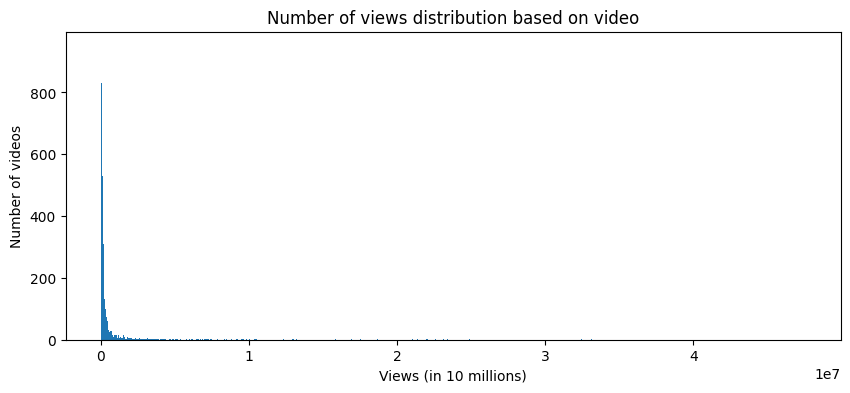

In [6]:
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(df['views'], bins = 1000)
plt.title('Number of views distribution based on video')
plt.xlabel('Views (in 10 millions)')
plt.ylabel('Number of videos')
plt.show()

### 3. Analysing comments

In [7]:
print('Max = ', max(df['comments']))
print('Min = ', min(df['comments']))
print('Avg = ', int(df['comments'].mean()))

Max =  127586
Min =  2
Avg =  829


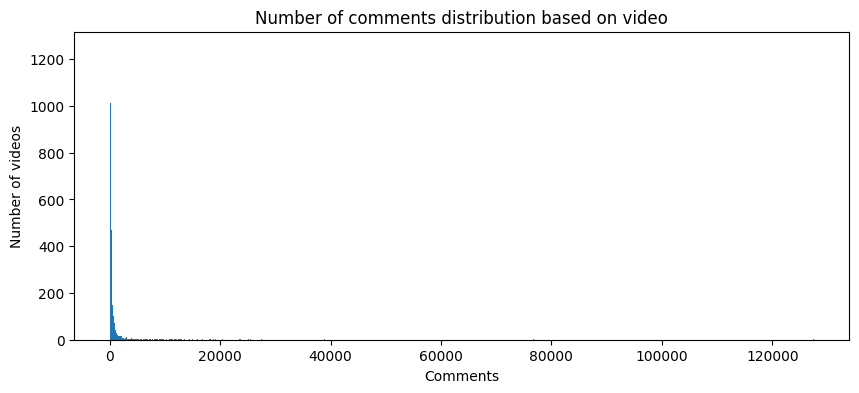

In [8]:
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(df['comments'], bins = 1000)
plt.title('Number of comments distribution based on video')
plt.xlabel('Comments')
plt.ylabel('Number of videos')
plt.show()

## Finding correlations from scratch

### a) Views-to-like

In [9]:
factors = []
for i in df['likes']/df['views']:
    factors.append(round(i,5))
    
df['views_to_like'] = factors

In [10]:
df.head()

,duration,title,views,likes,comments,date,month,year,day,views_to_like
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.03706
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.01387
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.02954
3,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,Mon,0.02632
4,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,Thu,0.02610


In [11]:
print('Max = ', max(df['views_to_like']))
print('Min = ', min(df['views_to_like']))
print('Avg = ', int(df['views_to_like'].mean()))

Max =  0.07977
Min =  0.00042
Avg =  0


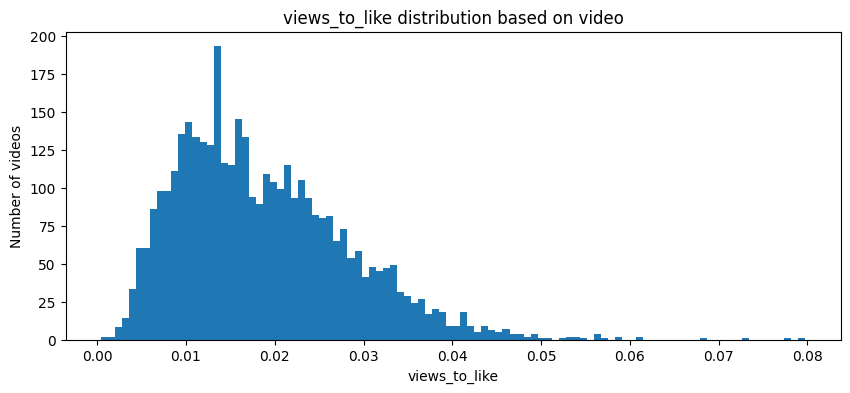

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
ax.hist(df['views_to_like'], bins = 100)
plt.title('views_to_like distribution based on video')
plt.xlabel('views_to_like')
plt.ylabel('Number of videos')
plt.show()

#### b) Adding predicted likes column

In [13]:
factor = df['views_to_like'].mode()[0]

In [14]:
predicted_likes = []

for i in df['views']:
    predicted_likes.append(int(i*factor))
    
df['predicted_likes'] = predicted_likes

In [15]:
df.head()

,duration,title,views,likes,comments,date,month,year,day,views_to_like,predicted_likes
0,10,The Future Will Be Shaped by Optimists | Kevin...,51273,1900,262,21,4,2022,Thu,0.03706,711
1,9,An Olympic Champion’s Unwavering Advocacy for ...,25597,355,53,20,4,2022,Wed,0.01387,355
2,7,The African Swamp Protecting Earth's Environme...,21430,633,40,20,4,2022,Wed,0.02954,297
3,66,Elon Musk: A future worth getting excited abou...,3609893,95000,8757,18,4,2022,Mon,0.02632,50105
4,55,"Elon Musk talks Twitter, Tesla and how his bra...",4405481,115000,10444,14,4,2022,Thu,0.02610,61148


#### c) Correlation between Views and Likes

In [16]:
data = []

for i in df.values:
    data.append([i[2], i[3]])
    
df_ = pd.DataFrame(data, columns=['views', 'likes'])

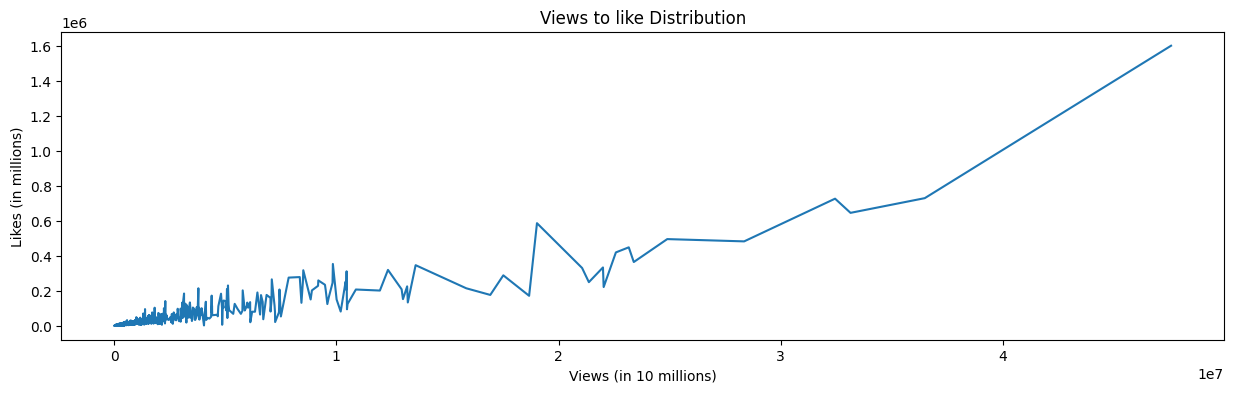

In [17]:
views = df_.sort_values(by='views')['views']
likes = df_.sort_values(by='views')['likes']


fig, ax = plt.subplots(figsize=(15,4))
ax.plot(views, likes)
plt.xlabel('Views (in 10 millions)')
plt.ylabel('Likes (in millions)')
plt.title('Views to like Distribution')
plt.show()

### Conclusion : There is very positive relation between Views and likes

#### d) Correlation between Views and comments

In [18]:
data = []

for i in df.values:
    data.append([i[2],i[4]])
    
df_ = pd.DataFrame(data, columns=['views', 'comments'])

In [19]:
views = df_.sort_values(by='views')['views']
comments = df_.sort_values(by='views')['comments']

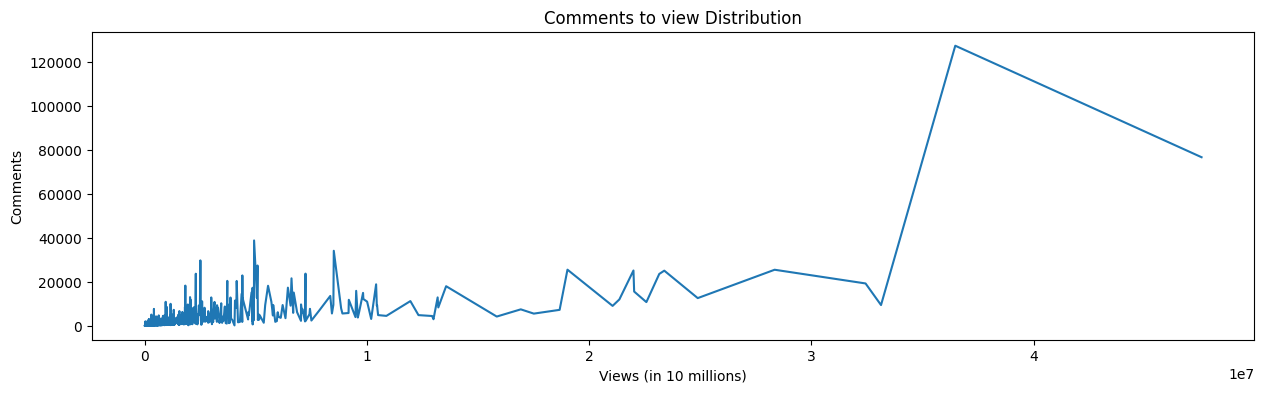

In [20]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(views, comments)
plt.xlabel('Views (in 10 millions)')
plt.ylabel('Comments')
plt.title('Comments to view Distribution')
plt.show()

### Conclusion : There is positive correlation between Views and Comments

#### e) Correlation between likes and comments

In [21]:
data = []
for i in df.values:
    data.append([i[3], i[4]])

df_ = pd.DataFrame(data, columns=['likes', 'comments'])

In [22]:
likes = df_.sort_values(by='likes')['likes']
comments = df_.sort_values(by='likes')['comments']

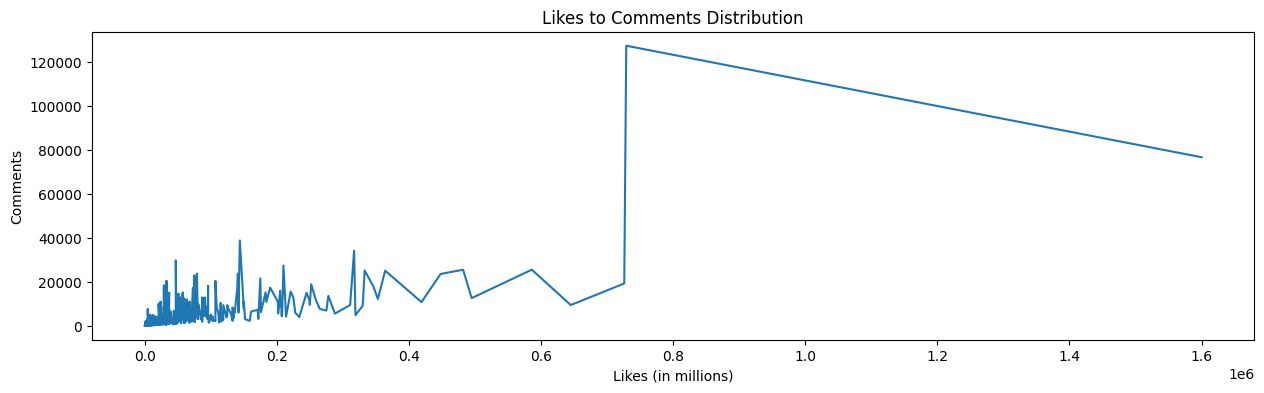

In [23]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(likes, comments)
plt.xlabel('Likes (in millions)')
plt.ylabel('Comments')
plt.title('Likes to Comments Distribution')
plt.show()

### Conclusion : There is positive correlation between Likes and Comments

#### f) Correlation between Date and Views

In [24]:
data = []

for i in df.values:
    data.append([i[2], i[5]])
    
df_ = pd.DataFrame(data, columns=['views', 'date'])

In [25]:
date = df_.sort_values(by='date')['date']
views = df_.sort_values(by='date')['views']

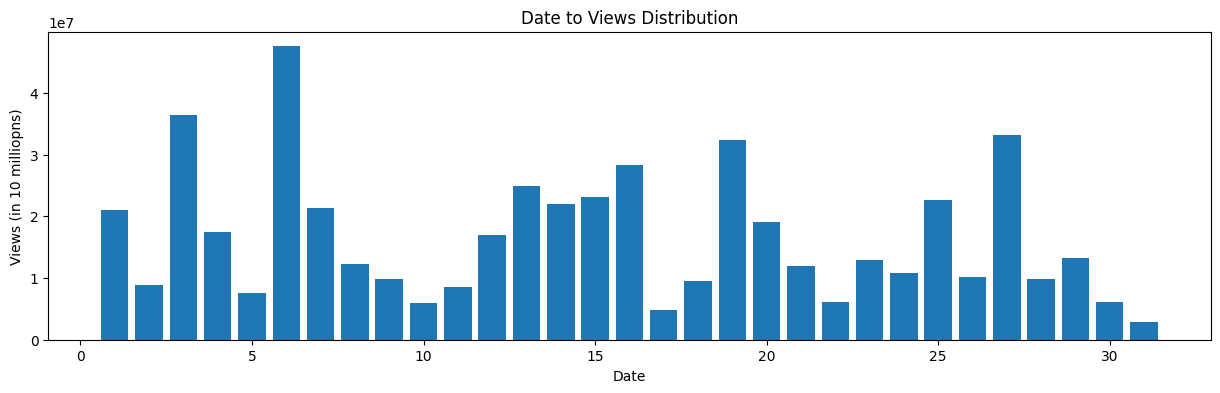

In [26]:
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(date, views)
plt.xlabel('Date')
plt.ylabel('Views (in 10 milliopns)')
plt.title('Date to Views Distribution')
plt.show()

### Conclusion : No correlation

#### g) Correlation between month and views

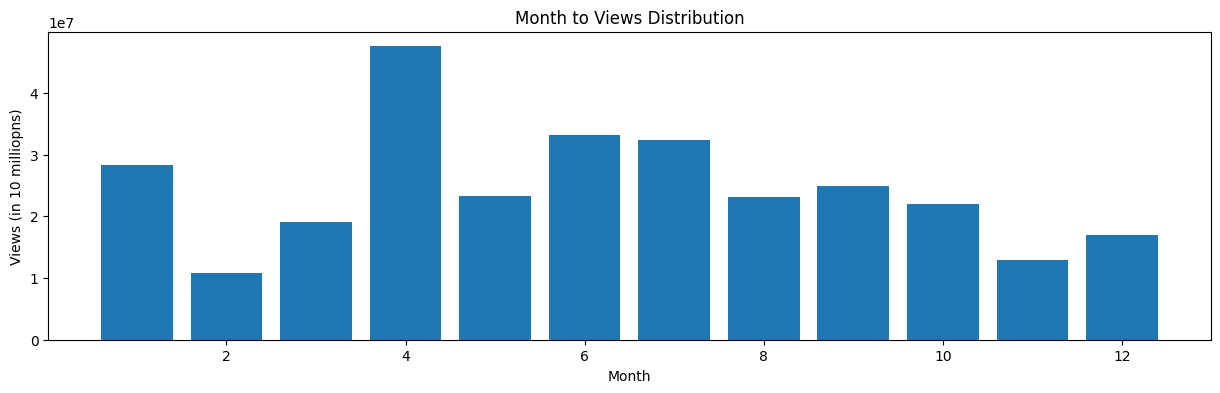

In [27]:
data = []
for i in df.values:
    data.append([i[2], i[6]])
df_ = pd.DataFrame(data, columns=['views', 'month'])

month = df_.sort_values(by='month')['month']
views = df_.sort_values(by='month')['views']

fig, ax = plt.subplots(figsize=(15,4))
ax.bar(month, views)
plt.xlabel('Month')
plt.ylabel('Views (in 10 milliopns)')
plt.title('Month to Views Distribution')
plt.show()

### Conclusion : No correlation

#### h) Correlation between year and views

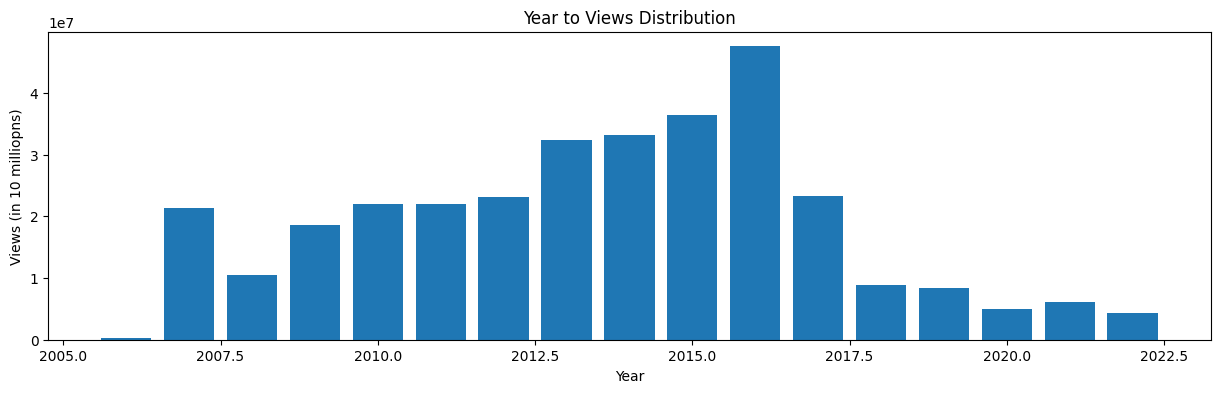

In [28]:
data = []
for i in df.values:
    data.append([i[2], i[7]])
df_ = pd.DataFrame(data, columns=['views', 'year'])

year = df_.sort_values(by='year')['year']
views = df_.sort_values(by='year')['views']

fig, ax = plt.subplots(figsize=(15,4))
ax.bar(year, views)
plt.xlabel('Year')
plt.ylabel('Views (in 10 milliopns)')
plt.title('Year to Views Distribution')
plt.show()

### Conclusion : No correlation

#### h) Correlation between day and views

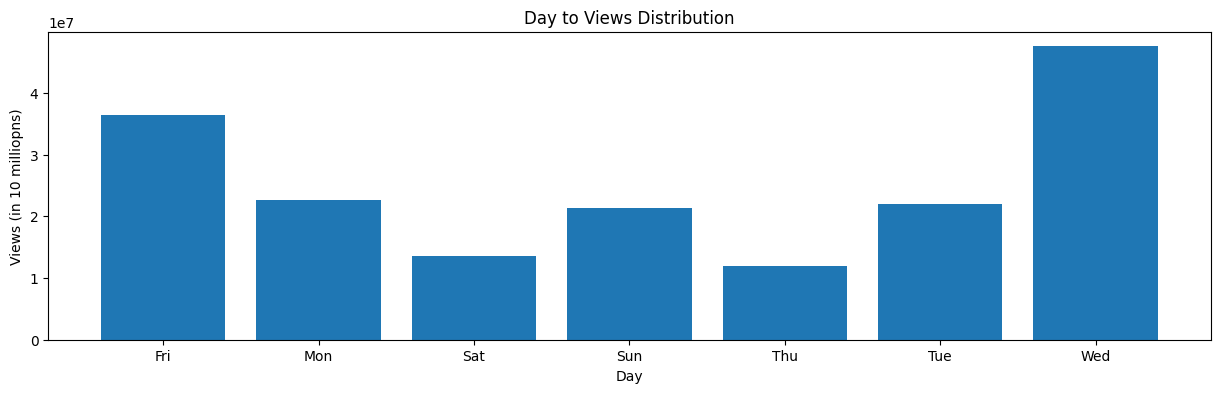

In [29]:
data = []
for i in df.values:
    data.append([i[2], i[8]])
df_ = pd.DataFrame(data, columns=['views', 'day'])

day = df_.sort_values(by='day')['day']
views = df_.sort_values(by='day')['views']

fig, ax = plt.subplots(figsize=(15,4))
ax.bar(day, views)
plt.xlabel('Day')
plt.ylabel('Views (in 10 milliopns)')
plt.title('Day to Views Distribution')
plt.show()

### Conclusion : No correlation

#### >> Correlation between [Likes, Predicted Likes]

In [30]:
data = []
for i in df.values:
    data.append([i[2], i[3], i[10]])
df_ = pd.DataFrame(data, columns=['views', 'likes', 'predicted_likes'])

In [31]:
views_ = df_.sort_values(by='views')['views']
likes_ = df_.sort_values(by='views')['likes']
predicted_likes = df_.sort_values(by='views')['predicted_likes']

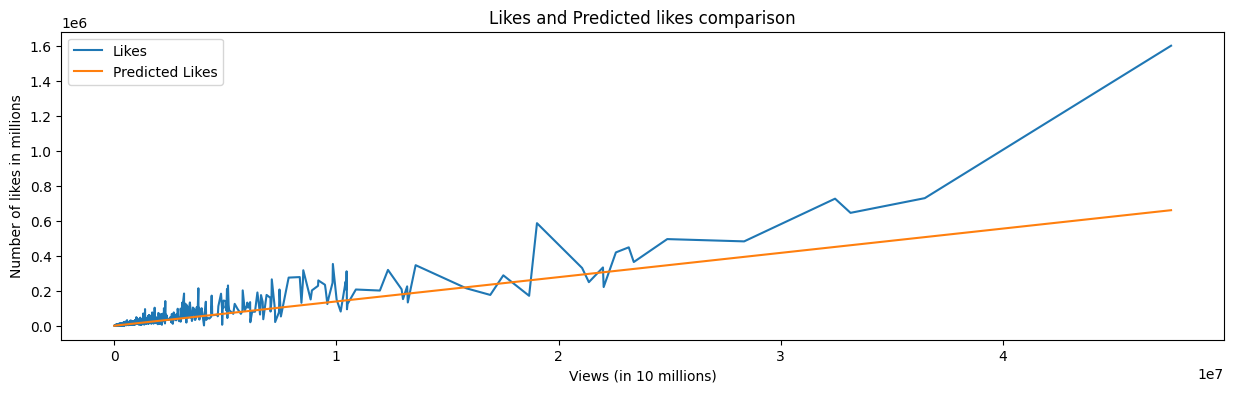

In [32]:
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(views_, likes_, label='Likes')
ax.plot(views_, predicted_likes, label = 'Predicted Likes')
plt.xlabel('Views (in 10 millions)')
plt.ylabel('Number of likes in millions')
plt.title('Likes and Predicted likes comparison')
plt.legend()
plt.show()